In [1]:
import os
import json
import tqdm
import itertools

from random import sample

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.pyplot as plt
import numpy as np
import random 
from typing import List, Set, Tuple

In [2]:
test_challenges_path = '../input/arc-agi_test_challenges.json'
train_challenges_path = '../input/arc-agi_training_challenges.json'
train_solutions_path = '../input/arc-agi_training_solutions.json'

with open(test_challenges_path) as fp:
    test_challenges = json.load(fp)
with open(train_challenges_path) as fp:
    train_challenges = json.load(fp)
with open(train_solutions_path) as fp:
    train_solutions = json.load(fp)

In [3]:
random.choice(list(test_challenges))

'05269061'

In [4]:
first = []

In [5]:
for i, j in enumerate(test_challenges):
    print(i)
    print(j)
    if i < 9:
        first.append(str(j))
    else:
        break

0
007bbfb7
1
00d62c1b
2
017c7c7b
3
025d127b
4
045e512c
5
0520fde7
6
05269061
7
05f2a901
8
06df4c85
9
08ed6ac7


In [6]:
test = test_challenges['007bbfb7']

In [7]:
def plot_json(task):
    """ plots a single json as matrix """
    cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = Normalize(vmin=0, vmax=9)
    
    # Create a figure for plotting
    figure, ax = plt.subplots(figsize=(4, 4))
    
    # Since task is a single matrix, plot it directly
    ax.imshow(task, cmap=cmap, norm=norm)
    ax.set_title("Matrix")
    ax.axis('off')  # Turn off axis labels
    
    plt.show()

In [8]:
def ret_matrix(ref):
    return train_challenges[ref]['train']

In [9]:
for i in ret_matrix("3906de3d"):
    print(i['input'])

[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0]]
[[0, 0, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 2, 0, 2, 0, 0, 0]]
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 2, 0, 0, 2, 0, 2, 0], [0, 0, 0, 2, 2, 0, 2, 0, 2, 0], [0, 0, 0, 2, 2, 0, 2, 0, 2, 0]]


In [10]:
a = ret_matrix('00d62c1b')

In [11]:
# MATRIX OPERATIONS OF PRIMITIVES

def hmirror_m(m):
    return np.fliplr(m)

def tophalf_m(m):
    return m[:len(m)//2]

def rot90_left_m(m):
    return np.rot90(m, 1)

def rot90_right_m(m):
    return np.rot90(m, -1)

def compress_m(m):
    ri = np.all(m == m[:, [0]], axis=1)
    ci = np.all(m == m[[0], :], axis=0)
    new_grid = np.delete(m, np.where(ri), axis=0)  
    new_grid = np.delete(new_grid, np.where(ci), axis=1)  
    
    return new_grid

def gravity_m(m):
    print(m.shape[1])
    for x in range(m.shape[1]):
        # Extract the column
        column = m[:, x]
        print(column)
        # Filter out the non-zero elements
        non_zero_elements = column[column != 0]
        # Create a new column filled with zeros
        new_column = np.zeros_like(column)
        
        # Handle only if there are non-zero elements
        if len(non_zero_elements) > 0:
            # Assign non-zero elements to the bottom of the new column
            new_column[-len(non_zero_elements):] = non_zero_elements
        
        # Assign the new column back to the matrix
        m[:, x] = new_column
    
    return m



def find_objects(matrix):
    def get_neighbors(row: int, col: int) -> List[Tuple[int, int]]:
        """Get valid neighboring coordinates (up, down, left, right)."""
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        neighbors = []
        for dx, dy in directions:
            new_row, new_col = row + dx, col + dy
            if (0 <= new_row < len(matrix) and 
                0 <= new_col < len(matrix[0])):
                neighbors.append((new_row, new_col))
        return neighbors
    
    def flood_fill(row: int, col: int, visited: Set[Tuple[int, int]]) -> Set[Tuple[int, int]]:
        """Recursively find all connected non-zero cells starting from (row, col)."""
        if (row, col) in visited or matrix[row][col] == 0:
            return set()
            
        current_object = {(row, col)}
        visited.add((row, col))
        
        for next_row, next_col in get_neighbors(row, col):
            if matrix[next_row][next_col] != 0:
                current_object.update(flood_fill(next_row, next_col, visited))
                
        return current_object
    
    # Convert input to numpy array for easier handling
    matrix = np.array(matrix)
    visited = set()
    objects = []
    
    # Scan through matrix
    for row in range(len(matrix)):
        for col in range(len(matrix[0])):
            if matrix[row][col] != 0 and (row, col) not in visited:
                object_cells = flood_fill(row, col, visited)
                if object_cells:  # Only add if cells were found
                    objects.append(object_cells)
    
    return objects


def group_into_columns(obj: Set[Tuple[int, int]]) -> dict:
    """Group object coordinates by column to maintain vertical structure"""
    columns = {}
    for row, col in obj:
        if col not in columns:
            columns[col] = []
        columns[col].append(row)
    # Sort rows within each column
    for col in columns:
        columns[col] = sorted(columns[col])
    return columns

def gravity_down_m(matrix: List[List[int]], objects: List[Set[Tuple[int, int]]]) -> List[List[int]]:
    """Makes objects fall down while maintaining vertical column structure"""
    matrix = np.array(matrix)
    new_matrix = np.zeros_like(matrix)
    rows, cols = matrix.shape
    
    # Process objects from bottom to top
    objects_with_bottom = [(max(coord[0] for coord in obj), obj) for obj in objects]
    sorted_objects = [obj for _, obj in sorted(objects_with_bottom, reverse=True)]
    
    for obj in sorted_objects:
        # Group coordinates by column
        columns = group_into_columns(obj)
        
        # Process each column separately
        for col, rows_in_col in columns.items():
            column_height = len(rows_in_col)
            min_row = min(rows_in_col)
            max_row = max(rows_in_col)
            
            # Find how far this column can fall
            can_move = True
            final_base_row = max_row
            
            while can_move and final_base_row < rows - 1:
                test_base_row = final_base_row + 1
                relative_positions = [i - min_row for i in rows_in_col]
                
                # Check if any position in this column would collide
                for rel_pos in relative_positions:
                    test_row = test_base_row - (max(relative_positions) - rel_pos)
                    if test_row >= rows or new_matrix[test_row, col] != 0:
                        can_move = False
                        break
                
                if can_move:
                    final_base_row += 1
            
            # Place the column at its final position
            for original_row in rows_in_col:
                relative_pos = original_row - max_row
                new_row = final_base_row + relative_pos
                new_matrix[new_row, col] = matrix[original_row, col]

    return new_matrix.tolist()

def gravity_up_m(matrix: List[List[int]], objects: List[Set[Tuple[int, int]]]) -> List[List[int]]:
    """Makes objects float up while maintaining vertical column structure"""
    matrix = np.array(matrix)
    new_matrix = np.zeros_like(matrix)
    rows, cols = matrix.shape
    
    # Process objects from top to bottom
    objects_with_top = [(min(coord[0] for coord in obj), obj) for obj in objects]
    sorted_objects = [obj for _, obj in sorted(objects_with_top)]
    
    for obj in sorted_objects:
        # Group coordinates by column
        columns = group_into_columns(obj)
        
        # Process each column separately
        for col, rows_in_col in columns.items():
            column_height = len(rows_in_col)
            min_row = min(rows_in_col)
            max_row = max(rows_in_col)
            
            # Find how far this column can rise
            can_move = True
            final_top_row = min_row
            
            while can_move and final_top_row > 0:
                test_top_row = final_top_row - 1
                relative_positions = [i - min_row for i in rows_in_col]
                
                # Check if any position in this column would collide
                for rel_pos in relative_positions:
                    test_row = test_top_row + rel_pos
                    if test_row < 0 or new_matrix[test_row, col] != 0:
                        can_move = False
                        break
                
                if can_move:
                    final_top_row -= 1
            
            # Place the column at its finalf position
            for original_row in rows_in_col:
                relative_pos = original_row - min_row
                new_row = final_top_row + relative_pos
                new_matrix[new_row, col] = matrix[original_row, col]

    return new_matrix.tolist()

from collections import Counter

def property_detection_len(m):
    num_dict = {}
    objects = find_objects(m)
    
    for obj in objects:
        length = len(obj)
        if length not in num_dict:
            num_dict[length] = []
        num_dict[length].append(obj)
        
    return num_dict

    #print(Counter(l))
"""
1) select all areas that are closed off completely by 4 side (00d62c1b)
2) multiply colors of rows/columns/diagonals through or every other row(05269061, 0a938d79) or ndjust horizontally a
3n) # Potentially useful primitives: and transformations (recolor)
4) # Potentially useful: cellular automata (cell #11)
5) gravity of a certain color or number of cells object
6) understand by color of cell
"""

'\n1) select all areas that are closed off completely by 4 side (00d62c1b)\n2) multiply colors of rows/columns/diagonals through or every other row(05269061, 0a938d79) or ndjust horizontally a\n3n) # Potentially useful primitives: and transformations (recolor)\n4) # Potentially useful: cellular automata (cell #11)\n5) gravity of a certain color or number of cells object\n6) understand by color of cell\n'

[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0]]


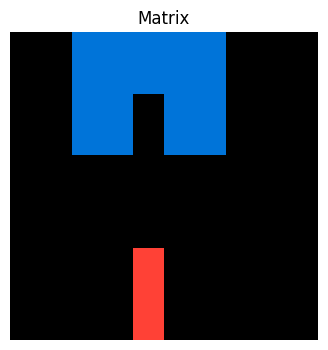

{18: [{(1, 2), (0, 4), (1, 5), (0, 2), (0, 5), (2, 2), (1, 6), (3, 2), (2, 5), (1, 3), (3, 5), (0, 3), (1, 4), (0, 6), (2, 3), (3, 3), (2, 6), (3, 6)}], 3: [{(7, 4), (8, 4), (9, 4)}]}


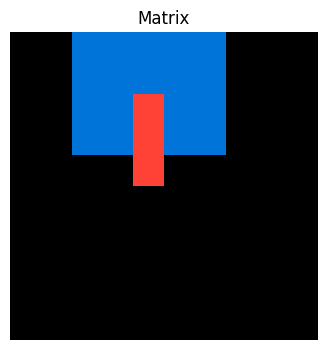

[[0, 0, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 2, 0, 2, 0, 0, 0]]


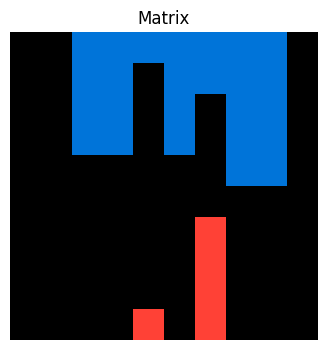

{25: [{(0, 7), (1, 2), (0, 4), (2, 7), (1, 5), (3, 7), (1, 8), (0, 2), (0, 5), (2, 2), (1, 6), (0, 8), (2, 5), (3, 2), (4, 7), (3, 5), (2, 8), (1, 3), (3, 8), (0, 3), (0, 6), (2, 3), (1, 7), (3, 3), (4, 8)}], 4: [{(6, 6), (9, 6), (7, 6), (8, 6)}], 1: [{(9, 4)}]}


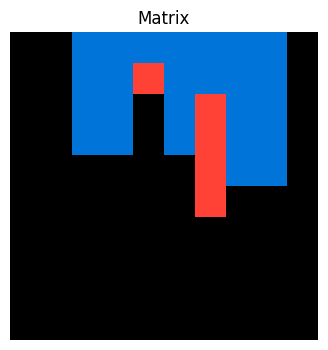

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 2, 0, 0, 2, 0, 2, 0], [0, 0, 0, 2, 2, 0, 2, 0, 2, 0], [0, 0, 0, 2, 2, 0, 2, 0, 2, 0]]


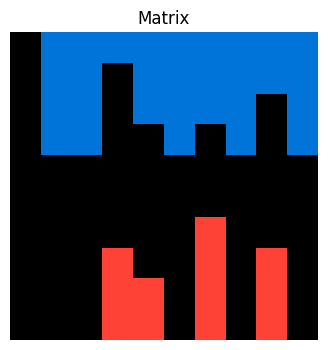

{29: [{(0, 1), (0, 7), (2, 4), (1, 2), (0, 4), (2, 1), (2, 7), (1, 5), (3, 1), (3, 7), (1, 8), (0, 2), (0, 5), (2, 2), (1, 6), (0, 8), (2, 5), (3, 2), (1, 9), (3, 5), (1, 1), (0, 3), (0, 9), (1, 4), (0, 6), (2, 9), (1, 7), (2, 6), (3, 9)}], 4: [{(6, 6), (9, 6), (7, 6), (8, 6)}], 5: [{(8, 3), (8, 4), (9, 3), (9, 4), (7, 3)}], 3: [{(8, 8), (9, 8), (7, 8)}]}


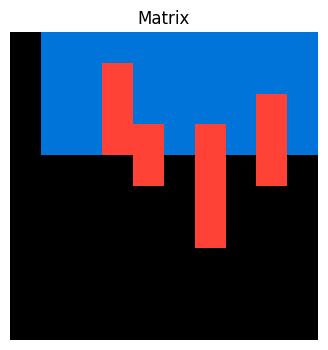

In [20]:
for i in ret_matrix("3906de3d"):
    m2 = i['input']
    print(m2)
    plot_json(m2)
    print(property_detection_len(m2))
    #plot_json(gravity_m(m2))
    plot_json(gravity_up_m(m2, find_objects(m2)))

In [13]:
first

['007bbfb7',
 '00d62c1b',
 '017c7c7b',
 '025d127b',
 '045e512c',
 '0520fde7',
 '05269061',
 '05f2a901',
 '06df4c85']

In [14]:
def plot_task(task):
    """ plots a task """
    examples = task['train']
    n_examples = len(examples)
    cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = Normalize(vmin=0, vmax=9)
    figure, axes = plt.subplots(2, n_examples, figsize=(n_examples * 4, 8))
    for column, example in enumerate(examples):
        axes[0, column].imshow(example['input'], cmap=cmap, norm=norm)
        axes[1, column].imshow(example['output'], cmap=cmap, norm=norm)
        axes[0, column].set_title("Input")
        axes[1, column].set_title("Output")
        axes[0, column].axis('off')
        axes[1, column].axis('off')
    plt.show()

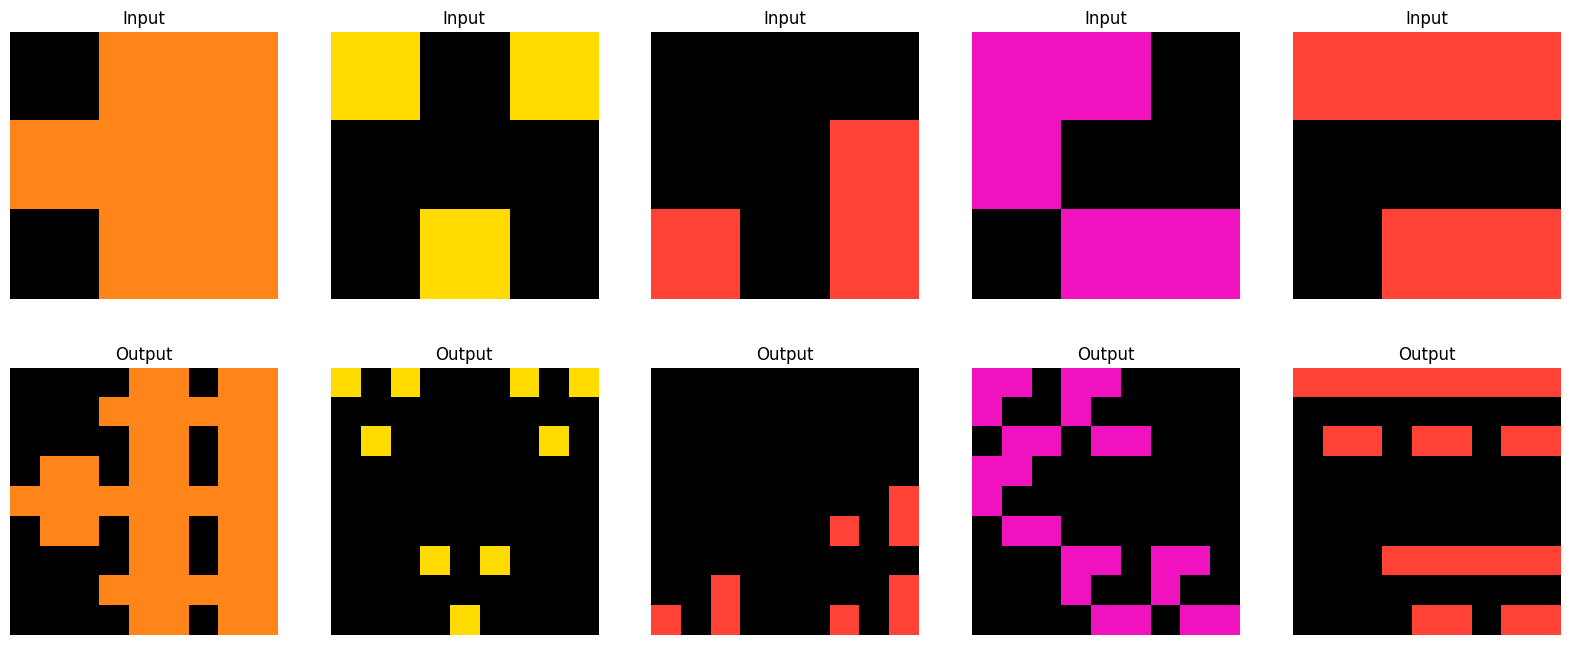

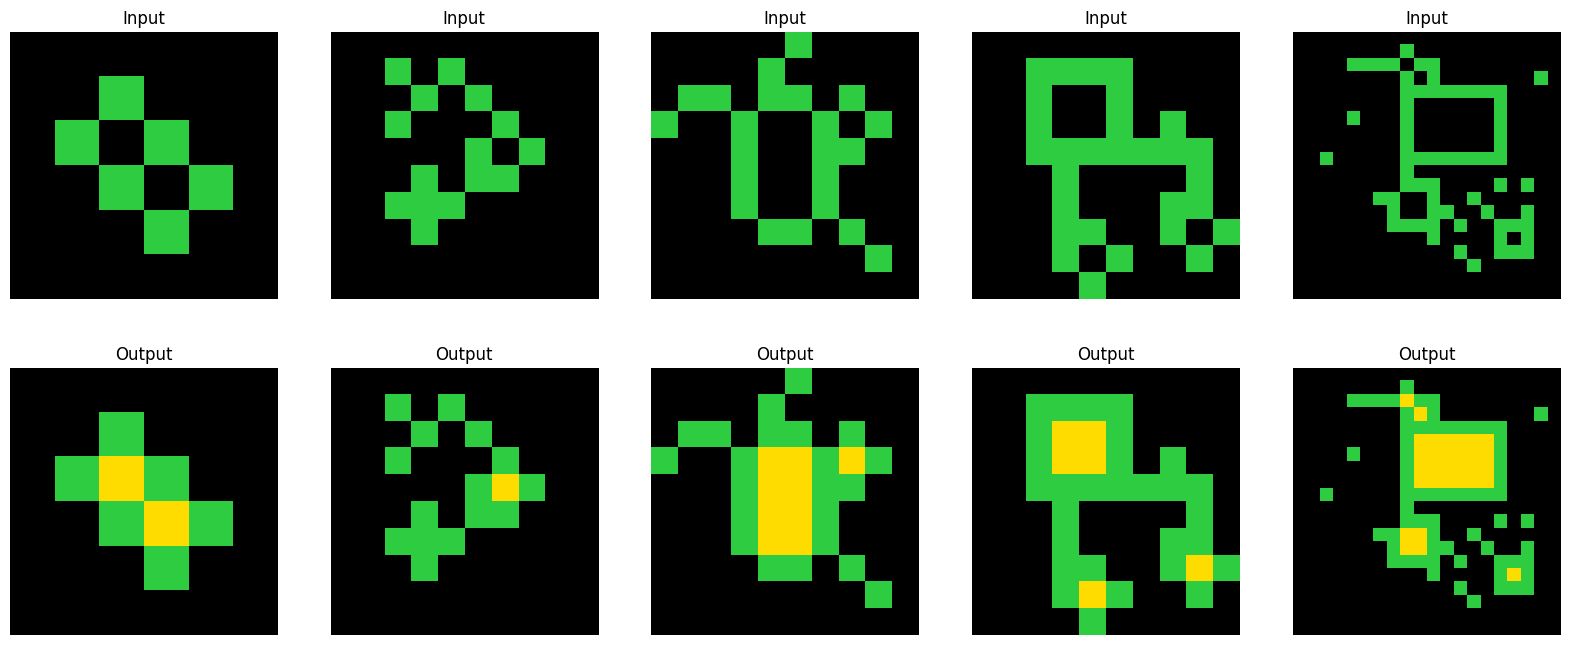

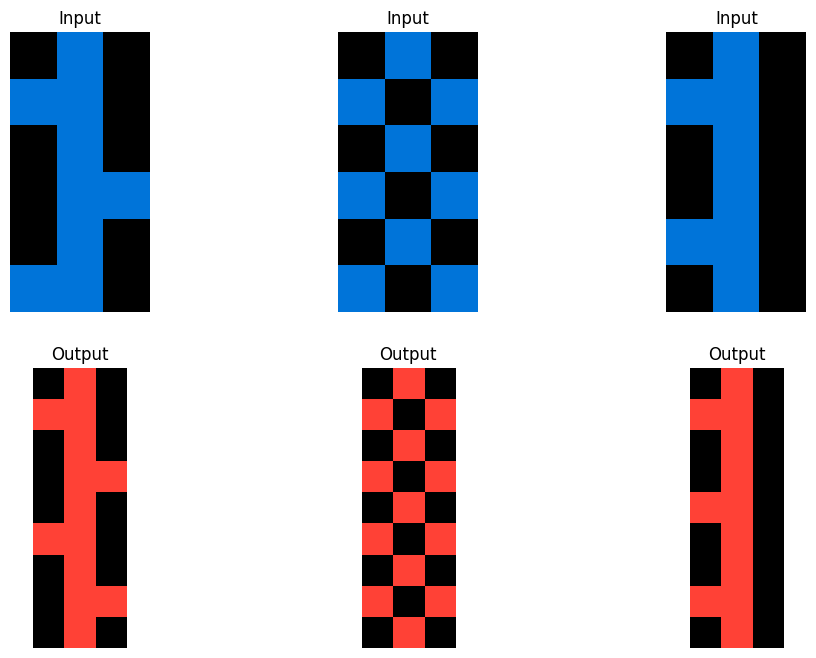

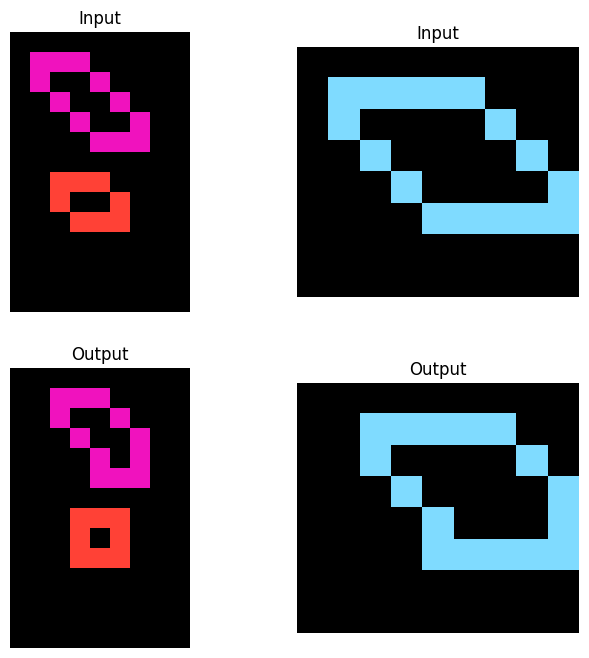

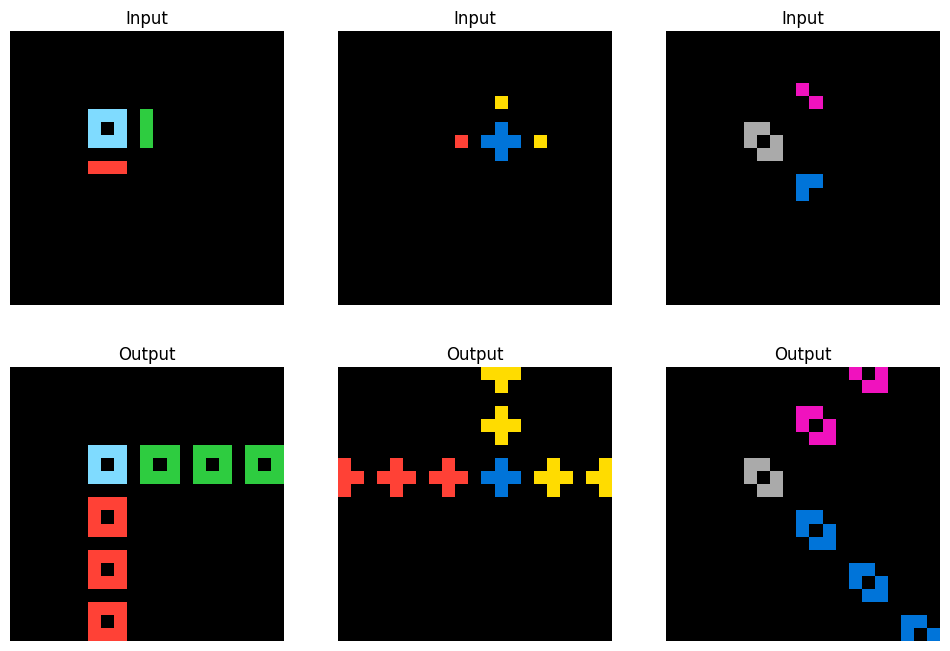

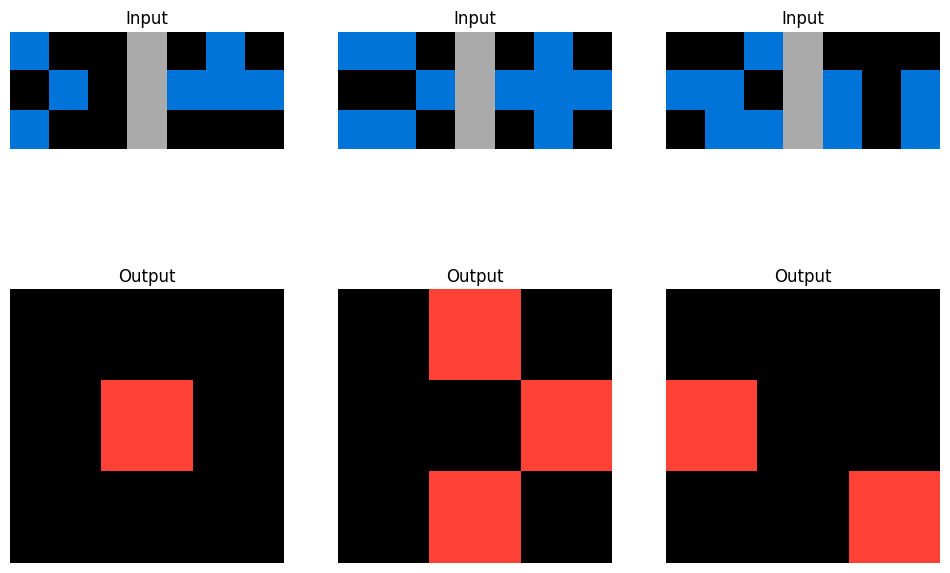

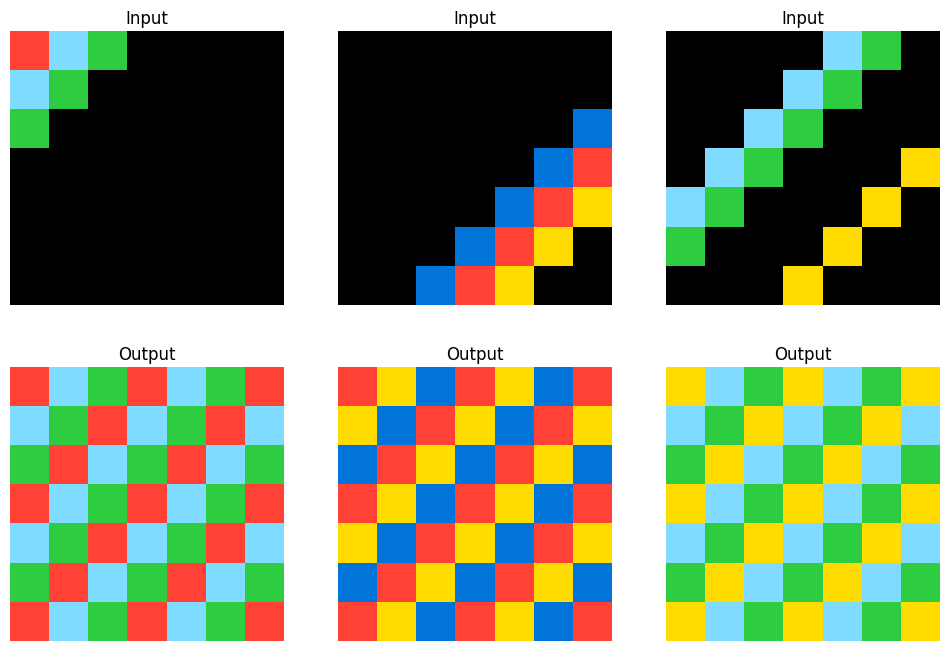

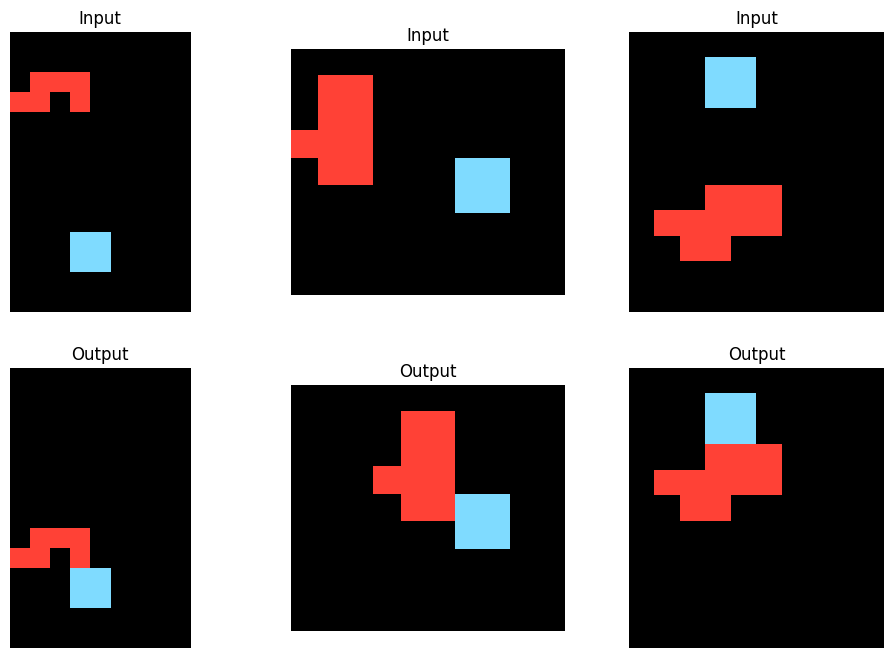

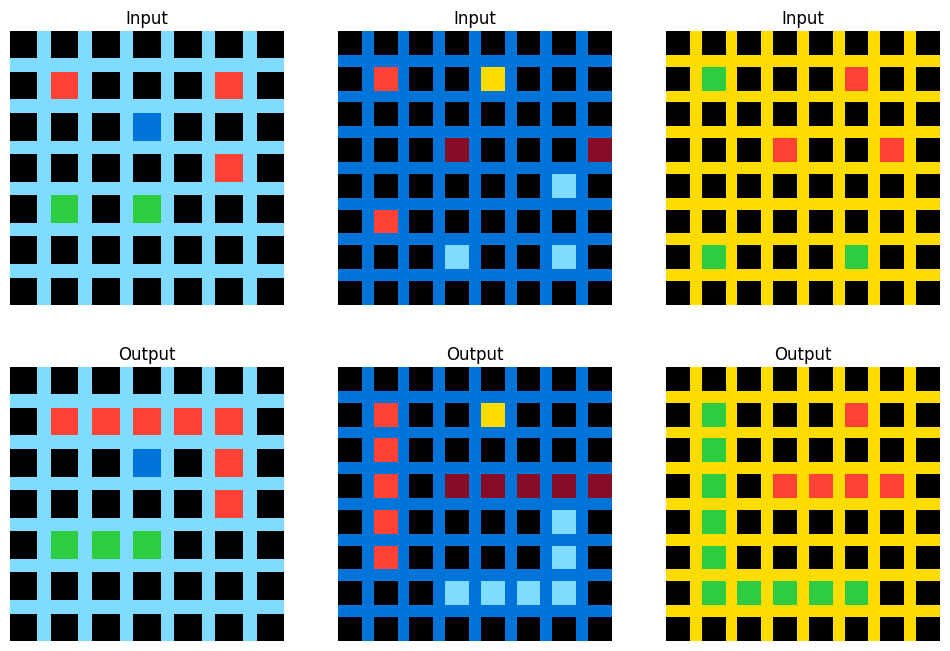

In [15]:
for i in first:
    plot_task(test_challenges[i])

In [16]:


# defining the DSL as the set of the primitives

DSL_primitives = {hmirror_m, tophalf_m, rot90_left_m, compress_m, gravity_m, find_objects, group_into_columns, gravity_down_m, gravity_up_m, property_detection_len}
primitive_names = {p.__name__ for p in DSL_primitives}
print(f'DSL consists of {len(DSL_primitives)} primitives: {primitive_names}')

DSL consists of 10 primitives: {'tophalf_m', 'hmirror_m', 'property_detection_len', 'gravity_down_m', 'rot90_left_m', 'group_into_columns', 'gravity_m', 'compress_m', 'gravity_up_m', 'find_objects'}


In [17]:
MAX_DEPTH = 4

# construct the program strings of all programs expressible by composing at most MAX_DEPTH primitives

program_strings = []
for depth in range(1, MAX_DEPTH+1):
    primitive_tuples = itertools.product(*[primitive_names]*depth)
    for primitives in primitive_tuples:
        left_side = "".join([p + "(" for p in primitives])
        right_side = ')' * depth
        program_string = f'lambda grid: {left_side}grid{right_side}'
        program_strings.append(program_string)


# print some of the program strings
print(f'Space to search consists of {len(program_strings)} programs:\n')
print('\n'.join([*program_strings[:10], '...']))


# map program strings to programs
programs = {prog_str: eval(prog_str) for prog_str in program_strings}

Space to search consists of 11110 programs:

lambda grid: tophalf_m(grid)
lambda grid: hmirror_m(grid)
lambda grid: property_detection_len(grid)
lambda grid: gravity_down_m(grid)
lambda grid: rot90_left_m(grid)
lambda grid: group_into_columns(grid)
lambda grid: gravity_m(grid)
lambda grid: compress_m(grid)
lambda grid: gravity_up_m(grid)
lambda grid: find_objects(grid)
...


In [18]:
"""  
guesses = dict()
# iterate over all tasks
for key, task in tqdm.tqdm(train_challenges.items()):
    train_inputs = [example['input'] for example in task['train']]
    train_outputs = [example['output'] for example in task['train']]
    hypotheses = []
    # iterate over all programs
    for program_string, program in programs.items():
        try:
            if all([program(i) == o for i, o in zip(train_inputs, train_outputs)]):
                # remember program if it explains all training examples
                hypotheses.append(program_string)
        except:
            pass
    # select first program for making predictions
    if len(hypotheses) > 0:
        print(f'found {len(hypotheses)} candidate programs for task {key}!')
        guesses[key] = hypotheses[0]
print(f'\nMade guesses for {len(guesses)} tasks')
"""

"  \nguesses = dict()\n# iterate over all tasks\nfor key, task in tqdm.tqdm(train_challenges.items()):\n    train_inputs = [example['input'] for example in task['train']]\n    train_outputs = [example['output'] for example in task['train']]\n    hypotheses = []\n    # iterate over all programs\n    for program_string, program in programs.items():\n        try:\n            if all([program(i) == o for i, o in zip(train_inputs, train_outputs)]):\n                # remember program if it explains all training examples\n                hypotheses.append(program_string)\n        except:\n            pass\n    # select first program for making predictions\n    if len(hypotheses) > 0:\n        print(f'found {len(hypotheses)} candidate programs for task {key}!')\n        guesses[key] = hypotheses[0]\nprint(f'\nMade guesses for {len(guesses)} tasks')\n"

In [19]:
solved = dict()

# iterate over all tasks for which a guess exists
for key, program_string in guesses.items():
    test_inputs = [example['input'] for example in train_challenges[key]['test']]
    program = eval(program_string)
    if all([program(i) == o for i, o in zip(test_inputs, train_solutions[key])]):
        # mark predition as correct if all test examples are solved by the program
        solved[key] = program_string


print(f'Predictions correct for {len(solved)}/{len(guesses)} tasks')

NameError: name 'guesses' is not defined

In [20]:
# visualize solved tasks
for key, program_string in solved.items():
    print(f'For task "{key}", found program "{program_string}"')
    plot_task(train_challenges[key])

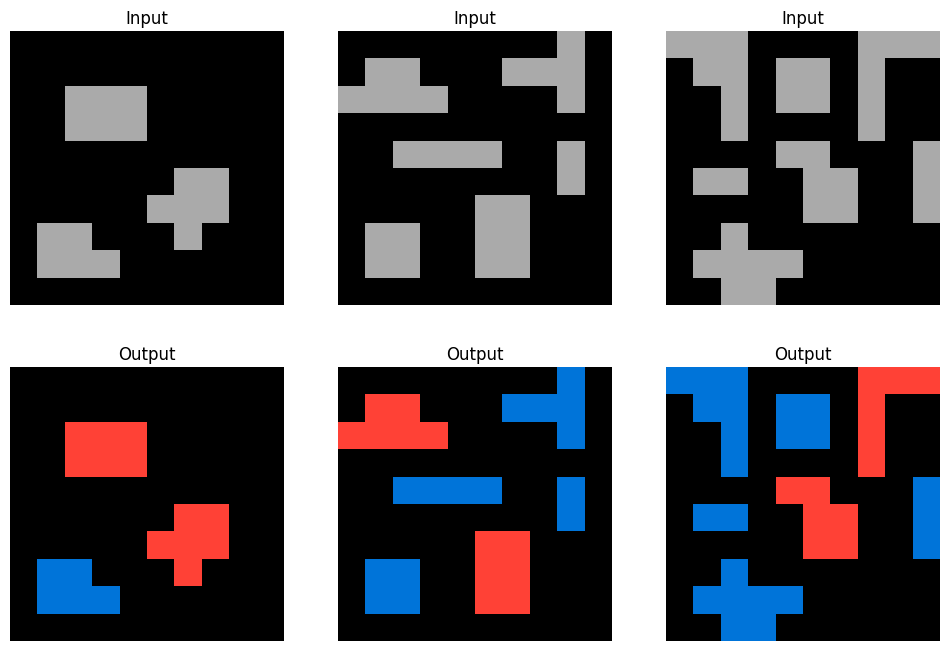

In [21]:
plot_task(train_challenges['d2abd087'])


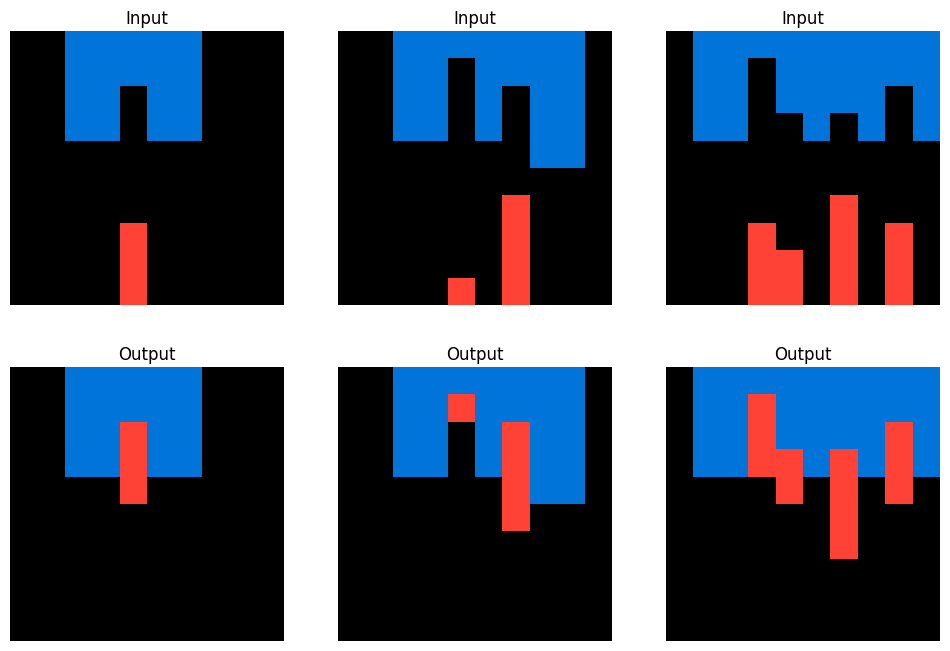

In [22]:
plot_task(train_challenges['3906de3d'])


In [23]:
pd_arr = [(p, d) for p in [8, 16, 32] for d in [2, 4, 8]]
for p, d in sorted(pd_arr, key=lambda pd: pd[0]**pd[1]):
    print(f'DSL with {p} primitives and max. depth {d} allows > {p**d} programs')

DSL with 8 primitives and max. depth 2 allows > 64 programs
DSL with 16 primitives and max. depth 2 allows > 256 programs
DSL with 32 primitives and max. depth 2 allows > 1024 programs
DSL with 8 primitives and max. depth 4 allows > 4096 programs
DSL with 16 primitives and max. depth 4 allows > 65536 programs
DSL with 32 primitives and max. depth 4 allows > 1048576 programs
DSL with 8 primitives and max. depth 8 allows > 16777216 programs
DSL with 16 primitives and max. depth 8 allows > 4294967296 programs
DSL with 32 primitives and max. depth 8 allows > 1099511627776 programs
